##Define Function <br>
$I(Q)=\frac G {Q^s} exp(\frac{-Q^2 Rg^2}{3-s})$ &emsp; $Q>=q_0 $<br>
$I(Q)=\frac P {Q^d}$ &emsp;&emsp;&emsp;&emsp; $ Q<=q_0 $

In [2]:
%matplotlib notebook
from scipy import optimize as opt
import scipy.special as sf
import matplotlib.pyplot as plt
import numpy as np

def piecewise_GP(x,q0,G,s,Rg,P,d,b):
    return np.piecewise(x, [x <= q0, x > q0],
                        [lambda x:(G/x**s)*np.exp(-1*(x**2)*(Rg**2)/(3-s)), 
                         lambda x:P/(x**d)])+b


#Restrict parameter values ((min val), (max val)) q0,G,s,Rg,P,d,b
lims = ((0,0,0,0,0,0,0),(np.inf,np.inf,2,300,np.inf,4,100)) 

#Fitting information
def chisq(x,y,sig,fited_params):
    return sum((y-piecewise_GP(x,*fited_params))**2/sig**2)

def dof(data,fited_params):
    return len(data)-len(fited_params)

def red_chisq(chisq,dof):
    return chisq/dof

def incert(cov_mat):
    return np.sqrt(np.diag(cov_mat))

<IPython.core.display.Javascript object>


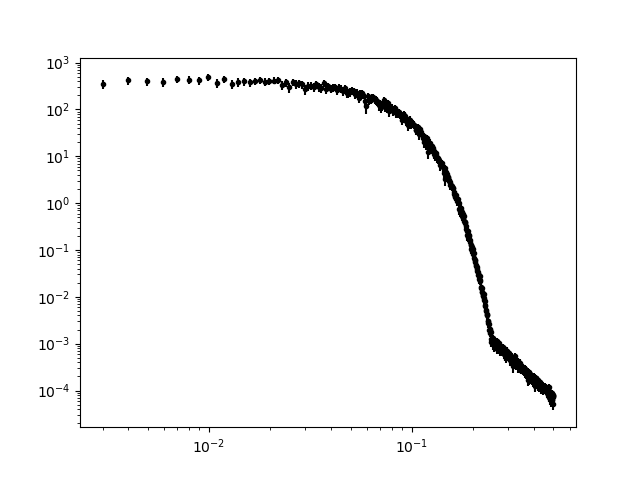

In [7]:
#Test data
xd = np.linspace(0.003,0.5,500) 
yd = piecewise_GP(xd,0.248,400,0,25,4.5e-6,4,1e-7)
sig = yd*0.2
y = yd + np.random.randn(len(yd))*yd*0.1 #*sig

plt.figure()
plt.errorbar(xd,y,yerr=sig,fmt='k.')
plt.yscale('log')
plt.xscale('log')

fitted params [1.00000000e+00 3.00343138e+02 7.15669679e-02 2.44134634e+01
 8.20928513e+00 2.00000000e+00 1.24726217e-04] Uncertainties [0.00000000e+00 4.32158114e+01 4.37708538e-02 2.89416678e-01
 0.00000000e+00 0.00000000e+00 3.74621101e-06]


<IPython.core.display.Javascript object>


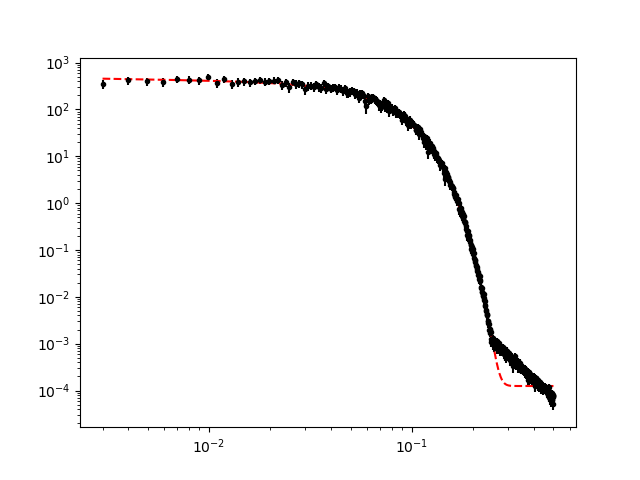

Chi squared 1869.6836523951072 Degrees of reedom 493 Reduced chisq 3.792461769564112 Probability 5.236432360170497e-159


In [11]:
#Fit data without initializing params
p,cov = opt.curve_fit(piecewise_GP,xd,y,sigma=sig,bounds=lims) #fitted params, cov matrix
print('fitted params',p,'Uncertainties',incert(cov))

plt.figure()
plt.errorbar(xd,y,yerr=sig,fmt='k.')
plt.yscale('log')
plt.xscale('log')
plt.loglog(xd,piecewise_GP(xd,*p),'r--')

a=chisq(xd,y,sig,p)
b=dof(y,p)
c=sf.gammaincc(b*0.5,a*0.5)
print('Chi squared',a,'Degrees of reedom', b,'Reduced chisq', red_chisq(a,b),'Probability',c)

<IPython.core.display.Javascript object>


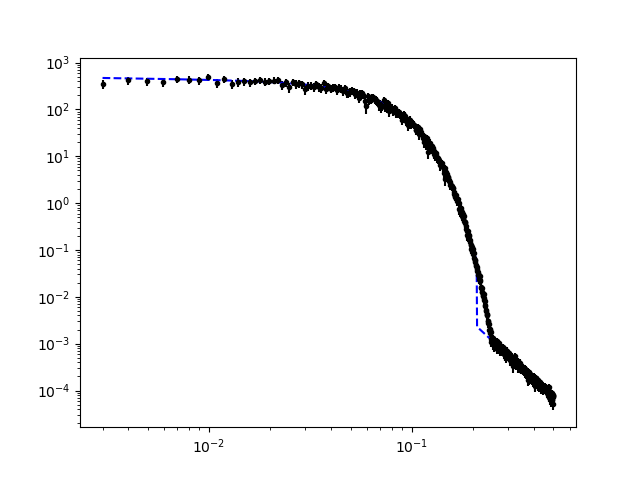

Fitted params [2.10000000e-01 3.23337866e+02 6.48260752e-02 2.42558043e+01
 4.46586710e-06 3.99812982e+00 6.40080575e-06] Uncertainties [0.00000000e+00 3.21723281e+01 2.90395029e-02 2.22910308e-01
 1.23469253e-06 2.13849514e-01 1.17579281e-05]
Chi squared 725.045255225441 Degrees of reedom 493 Reduced chisq 1.4706800308832475 Probability 4.229591267939372e-11


In [13]:
#Fit data initializing params
init_vals = [0.21,350,0,20,4e-6,3.5,1e-7]
p_init,cov_init = opt.curve_fit(piecewise_GP,xd,y,sigma=sig,p0=init_vals,bounds=lims)

plt.figure()
plt.errorbar(xd,y,yerr=sig,fmt='k.')
plt.yscale('log')
plt.xscale('log')
plt.loglog(xd,piecewise_GP(xd,*p_init),'b--')

print('Fitted params',p_init,'Uncertainties',incert(cov_init))
a = chisq(xd,y,sig,p_init)
b = dof(y,p_init)
c = sf.gammaincc(b*0.5,a*0.5)
print('Chi squared',a,'Degrees of reedom', b,'Reduced chisq', red_chisq(a,b),'Probability',c)